In [63]:
from helper_functions import *

In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import warnings
warnings.filterwarnings('ignore')
import pickle

In [66]:

with open(f'BTCUpsideOutliersMaxReturnOver30Days.pkl', 'rb') as file:
    results_upside = pickle.load(file)

In [67]:
results_upside

,Num Features,num_clusters,selected_features,stdevs,metric
474882,5,5,"[CB_DaysSincePreviousLowPivot, FMACB_PreviousL...","[0.0564257209626963, 0.3959400052679577, 0.106...",0.157642
281199,5,5,"[SMACB, CB_DaysSincePreviousHighPivot, FMACB_P...","[0.3973987113464936, 0.10757002719116524, 0.05...",0.158469
474870,5,5,"[CB_DaysSincePreviousLowPivot, FMACB_PreviousL...","[0.19003344685435172, 0.39610120673690874, 0.1...",0.159209
443004,5,5,"[CB_DaysSincePreviousHighPivot, FMACB_Previous...","[0.10463395788422972, 0.3926275604738136, 0.20...",0.159544
442806,5,5,"[CB_DaysSincePreviousHighPivot, FMACB_Previous...","[0.033354584842744846, 0.4004988020283885, 0.1...",0.160357
...,...,...,...,...,...
617573,5,7,"[Min_FMACB_10, Max_SMACB_10, ROC_CB_10, ROC_FM...","[0.24294444266160511, 0.45808246691715376, 0.1...",NaN
617585,5,7,"[Min_FMACB_10, Min_SMACB_10, ROC_CB_10, ROC_FM...","[0.5050143229283282, 0.0911964825597197, 0.250...",NaN
617599,5,6,"[Max_SMACB_10, Min_SMACB_10, ROC_CB_10, ROC_FM...","[0.2078571645638956, 0.40788143838165863, 0.11...",NaN
617600,5,7,"[Max_SMACB_10, Min_SMACB_10, ROC_CB_10, ROC_FM...","[0.212650105436669, 0.3177825620565555, 0.2758...",NaN


In [68]:
data_inp = get_data_BTC()
#plot_price_cb(data_inp)
data = data_inp.copy().drop(columns=["FReturn","Volume","CB_TypeCurrentPivot","CB_PivotValue","CB_TypePreviousPivot","SMACB_TypeCurrentPivot","SMACB_PivotValue","SMACB_TypePreviousPivot","FMACB_TypeCurrentPivot","FMACB_PivotValue","FMACB_TypePreviousPivot","CB_PreviousPivotValue","SMACB_PreviousPivotValue","FMACB_PreviousPivotValue"])
data = data.iloc[100:-1]
data.set_index("Date", inplace=True)
data.columns

Index(['Open', 'High', 'Low', 'Close', 'CB', 'FMACB', 'SMACB',
       'CB_PreviousHighPivotValueCB', 'CB_PreviousLowPivotValueCB',
       'CB_DaysSincePreviousHighPivot', 'CB_DaysSincePreviousLowPivot',
       'CB_IsHighPivot', 'CB_IsLowPivot', 'FMACB_PreviousHighPivotValueCB',
       'FMACB_PreviousLowPivotValueCB', 'FMACB_DaysSincePreviousHighPivot',
       'FMACB_DaysSincePreviousLowPivot', 'FMACB_IsHighPivot',
       'FMACB_IsLowPivot', 'SMACB_PreviousHighPivotValueCB',
       'SMACB_PreviousLowPivotValueCB', 'SMACB_DaysSincePreviousHighPivot',
       'SMACB_DaysSincePreviousLowPivot', 'SMACB_IsHighPivot',
       'SMACB_IsLowPivot', 'Max_CB_10', 'Min_CB_10', 'Max_CB_20', 'Min_CB_20',
       'Max_CB_30', 'Min_CB_30', 'Max_CB_60', 'Min_CB_60', 'Max_FMACB_10',
       'Min_FMACB_10', 'Max_FMACB_20', 'Min_FMACB_20', 'Max_FMACB_30',
       'Min_FMACB_30', 'Max_FMACB_60', 'Min_FMACB_60', 'Max_SMACB_10',
       'Min_SMACB_10', 'Max_SMACB_20', 'Min_SMACB_20', 'Max_SMACB_30',
       'Min_SMA

In [69]:
## Split Train, Test, Validate
df_train = data.loc[:"2018"]
df_validate = data.loc["2019":"2020"]
df_test = data.loc["2021":]

In [70]:
scaled_df_train = pd.DataFrame(StandardScaler().fit_transform(df_train), columns=df_train.columns, index=df_train.index)

In [71]:
df_train["FReturn30Unscaled"] = df_train["Close"].pct_change(30)
scaled_df_train = pd.concat([scaled_df_train, df_train["FReturn30Unscaled"]], axis=1)


In [72]:
df_cluster_upside = prepare_clustering_dataframe(scaled_df_train, df_train, how="UpsideMax")
df_cluster_all = prepare_clustering_dataframe(scaled_df_train, df_train, how="UpsideMaxAll")


In [73]:
results = []
all_features = list(df_cluster_upside.columns)

In [74]:
all_features.remove('FReturn')
all_features.remove('FReturn30')
all_features.remove('FReturn30Unscaled')
num_features = 5
selected_features = ['CB_DaysSincePreviousLowPivot',
 'FMACB_PreviousLowPivotValueCB',
 'SMACB_DaysSincePreviousLowPivot',
 'Min_SMACB_10',
 'ROC_SMACB_10']

num_clusters = 5
df_cluster_input = df_cluster_upside[selected_features]
df_cluster_predict = df_cluster_all[selected_features]
X_inp = df_cluster_input.values
X_pred = df_cluster_predict.values
k_means = KMeans(n_clusters=num_clusters, random_state = RANDOM_STATE)
model = k_means.fit(X_inp)
centers = model.cluster_centers_
y_hat = k_means.predict(X_pred)
labels = k_means.labels_

In [13]:
# #Outliers
# df_cluster_input = pd.concat([df_cluster_input.reset_index(), df_cluster_downside.reset_index()[["FReturn", "FReturn30"]],pd.DataFrame(labels).rename({0: 'labels'}, axis=1)], axis=1).set_index("Date")

In [75]:
#All datapoints
df_cluster_predict = pd.concat([df_cluster_predict.reset_index(), df_cluster_all.reset_index()[["FReturn", "FReturn30Unscaled"]],pd.DataFrame(y_hat).rename({0: 'labels'}, axis=1)], axis=1).set_index("Date")


In [15]:
# stdevs = []
# for label in range(num_clusters):
#     if len(df_cluster_input[df_cluster_input["labels"] == label]) > 0:
#         stdevs.append(df_cluster_input[df_cluster_input["labels"] == label]["FReturn"].std(axis=0))
#     else:
#         stdevs.append(0)
# results.append({"Num Features": num_features, "num_clusters": num_clusters,"selected_features": selected_features, "stdevs": stdevs})
# res = pd.DataFrame(results)
# res
#

In [16]:
# print(res.iloc[0]["Num Features"])
# print(res.iloc[0]["num_clusters"])
# print(res.iloc[0]["selected_features"])
#

In [17]:
# for label in range(num_clusters):
#     df = df_cluster_input[df_cluster_input["labels"] == label]
#     print(len(df))
#     df['FReturn30'].hist(bins=10)
#     plt.show()
#
#

In [18]:
# df_cluster_input.columns
#

In [19]:
# # df_cluster_input = df_cluster_input[df_cluster_input['ROC_CB_10']>-2000]
# # df_cluster_predict['ROC_CB_10'].plot()
#

In [20]:
# plot_columns = list(df_cluster_input.columns)#.remove('labels')
# plot_columns.remove('labels')
# plot_columns.remove('FReturn')
# plot_columns.remove('FReturn30')
# plot_pairs = list(itertools.combinations(plot_columns, 2))
#

In [21]:
# plot_pairs
#

In [22]:
# #plotting features against labels
# for pair in plot_pairs:
#     sns.lmplot(x=pair[0],y=pair[1],data=df_cluster_input,hue='labels',fit_reg=False)
#

In [23]:
# #plotting features against FReturn30
# for pair in plot_pairs:
#     fig = plt.figure(figsize=(8, 6))
#     fig = plt.scatter(x=df_cluster_input[pair[0]],y=df_cluster_input[pair[1]], c=df_cluster_input['FReturn30'], cmap='inferno')
#     plt.xlabel(pair[0])
#     plt.ylabel(pair[1])
#     plt.colorbar()
#     plt.show()
#

In [24]:
# for pair in plot_pairs:
#     fig = plt.figure(figsize=(8, 6))
#     fig = plt.scatter(x=df_cluster_input[pair[0]],y=df_cluster_input[pair[1]], c=df_cluster_input['FReturn'], cmap='inferno')
#     plt.xlabel(pair[0])
#     plt.ylabel(pair[1])
#     plt.colorbar()
#     plt.show()

In [76]:
stdevs = []
for label in range(num_clusters):
    if len(df_cluster_predict[df_cluster_predict["labels"] == label]) > 0:
        stdevs.append(df_cluster_predict[df_cluster_predict["labels"] == label]["FReturn"].std(axis=0))
    else:
        stdevs.append(0)
results.append({"Num Features": num_features, "num_clusters": num_clusters,"selected_features": selected_features, "stdevs": stdevs})
res = pd.DataFrame(results)
res

,Num Features,num_clusters,selected_features,stdevs
0,5,5,"[CB_DaysSincePreviousLowPivot, FMACB_PreviousL...","[0.11117041141575737, 0.3214621600790776, 0.13..."


In [77]:
print(res.iloc[0]["Num Features"])
print(res.iloc[0]["num_clusters"])
print(res.iloc[0]["selected_features"])

5
5
['CB_DaysSincePreviousLowPivot', 'FMACB_PreviousLowPivotValueCB', 'SMACB_DaysSincePreviousLowPivot', 'Min_SMACB_10', 'ROC_SMACB_10']


75


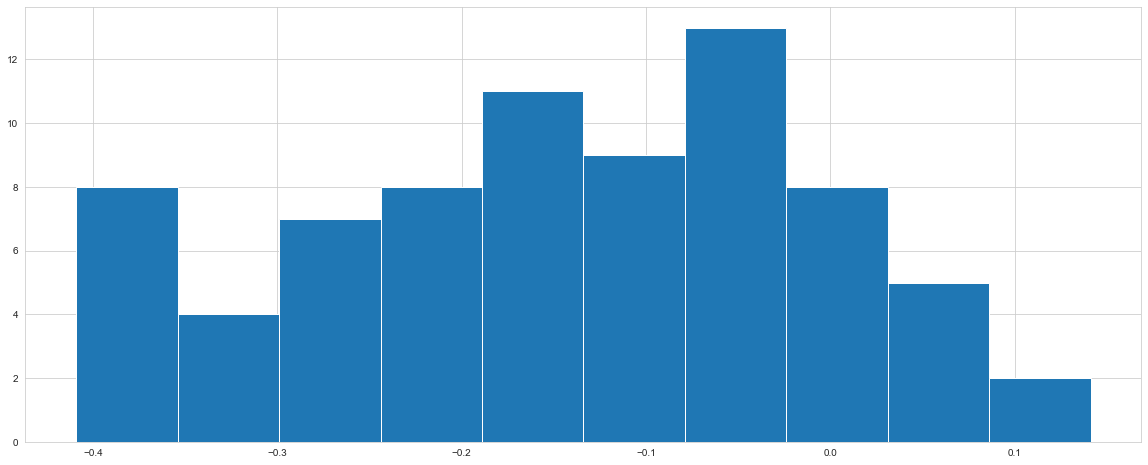

459


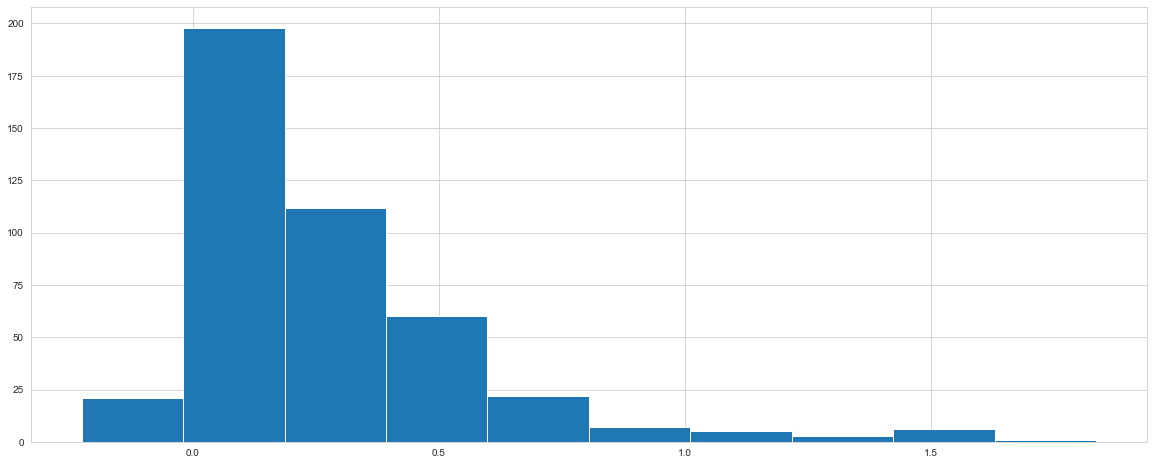

683


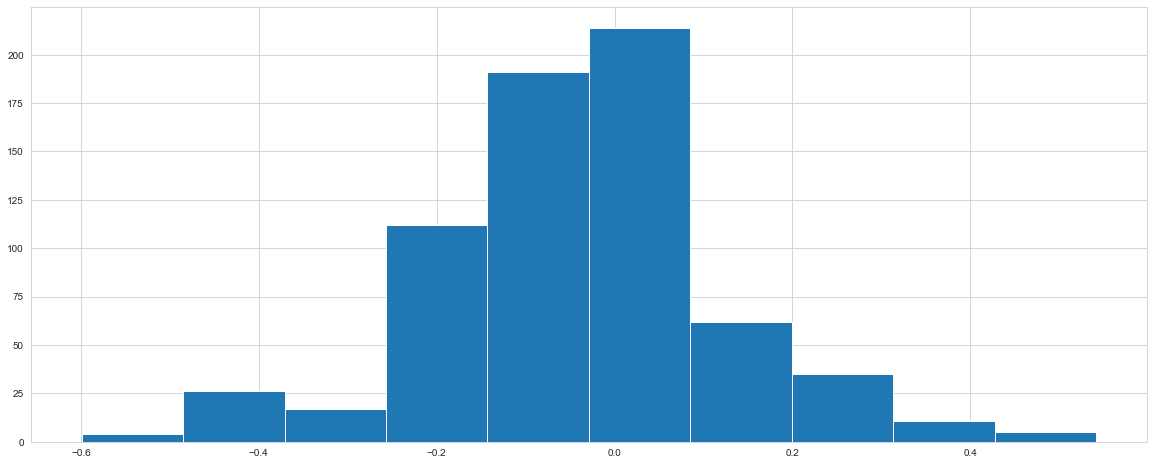

26


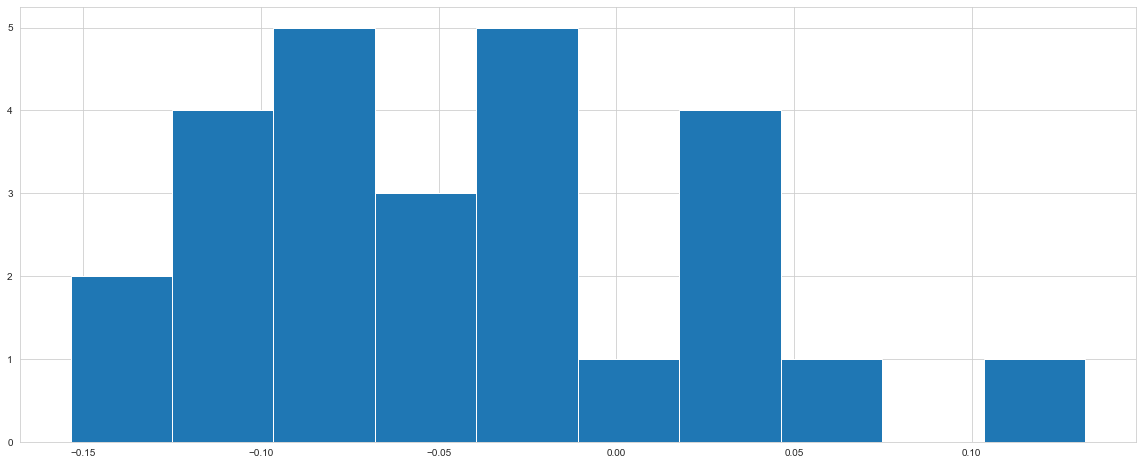

152


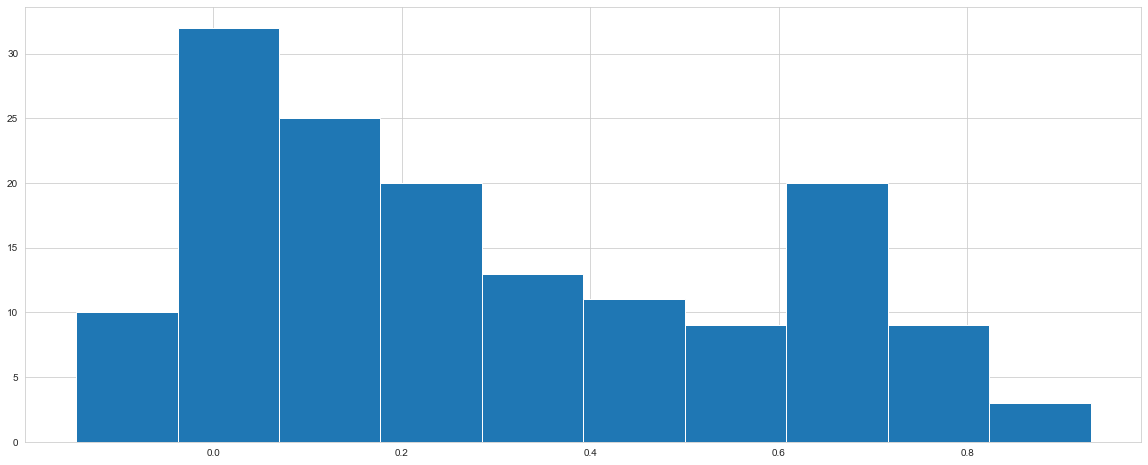

In [78]:
for label in range(num_clusters):
    df = df_cluster_predict[df_cluster_predict["labels"] == label]
    print(len(df))
    df['FReturn30Unscaled'].hist(bins=10)
    plt.show()


In [28]:
df_cluster_predict.columns

Index(['CB_DaysSincePreviousLowPivot', 'FMACB_PreviousLowPivotValueCB',
       'SMACB_DaysSincePreviousLowPivot', 'Min_SMACB_10', 'ROC_SMACB_10',
       'FReturn', 'FReturn30Unscaled', 'labels'],
      dtype='object')

In [29]:
# df_cluster_predict = df_cluster_predict[df_cluster_predict['ROC_CB_10']>-2000]
# df_cluster_predict['ROC_CB_10'].plot()

In [30]:
plot_columns = list(df_cluster_predict.columns)#.remove('labels')
plot_columns.remove('labels')
plot_columns.remove('FReturn')
plot_columns.remove('FReturn30Unscaled')
plot_pairs = list(itertools.combinations(plot_columns, 2))

In [31]:
plot_pairs

[('CB_DaysSincePreviousLowPivot', 'FMACB_PreviousLowPivotValueCB'),
 ('CB_DaysSincePreviousLowPivot', 'SMACB_DaysSincePreviousLowPivot'),
 ('CB_DaysSincePreviousLowPivot', 'Min_SMACB_10'),
 ('CB_DaysSincePreviousLowPivot', 'ROC_SMACB_10'),
 ('FMACB_PreviousLowPivotValueCB', 'SMACB_DaysSincePreviousLowPivot'),
 ('FMACB_PreviousLowPivotValueCB', 'Min_SMACB_10'),
 ('FMACB_PreviousLowPivotValueCB', 'ROC_SMACB_10'),
 ('SMACB_DaysSincePreviousLowPivot', 'Min_SMACB_10'),
 ('SMACB_DaysSincePreviousLowPivot', 'ROC_SMACB_10'),
 ('Min_SMACB_10', 'ROC_SMACB_10')]

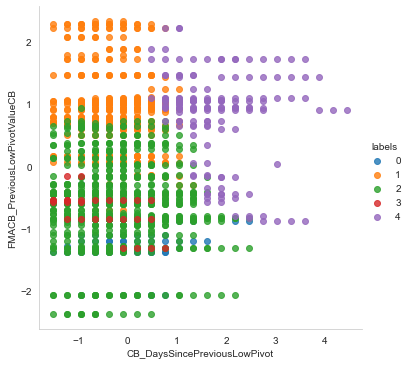

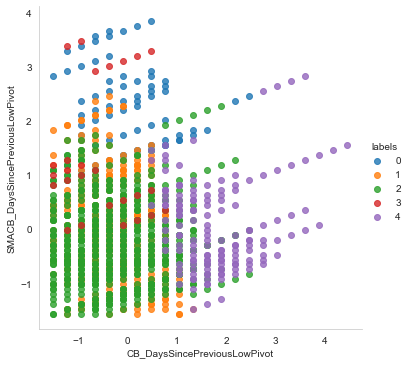

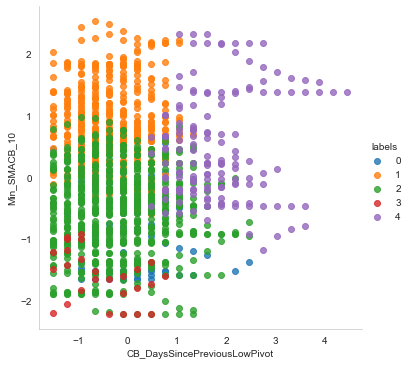

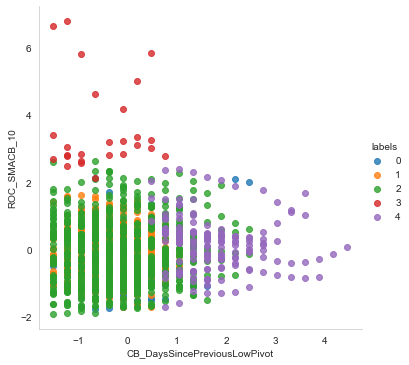

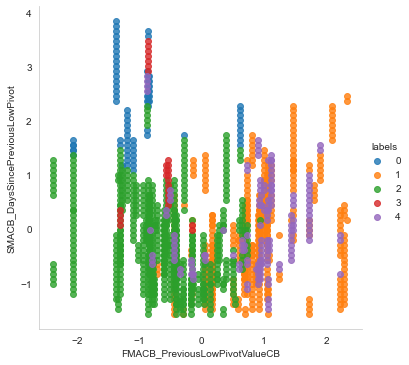

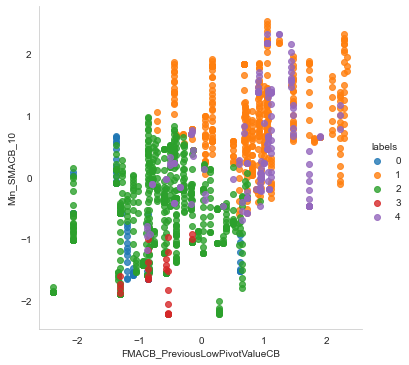

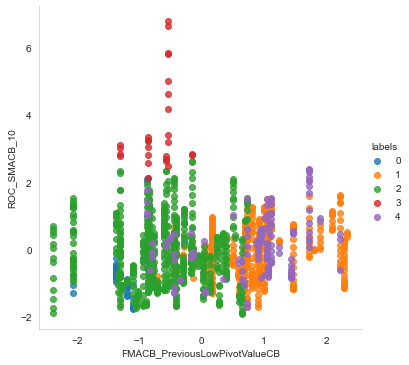

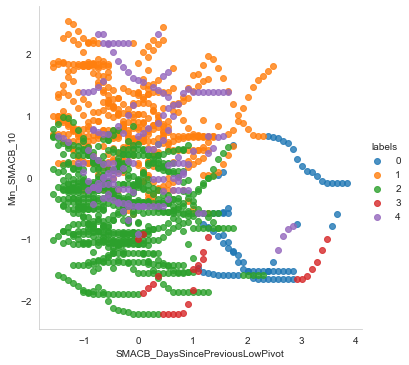

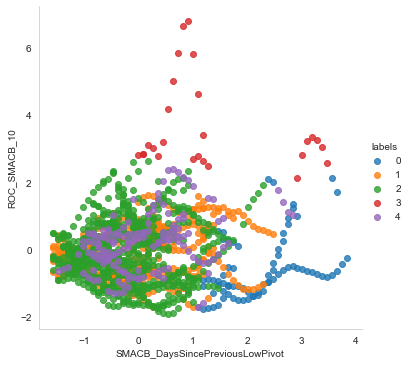

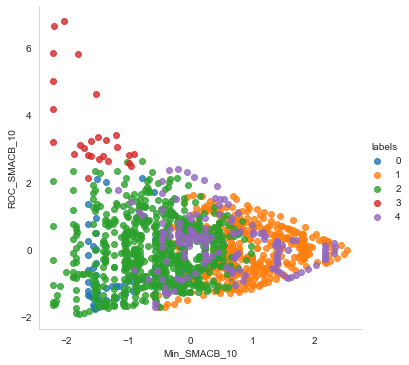

In [32]:
#plotting features against labels
for pair in plot_pairs:
    sns.lmplot(x=pair[0],y=pair[1],data=df_cluster_predict,hue='labels',fit_reg=False)

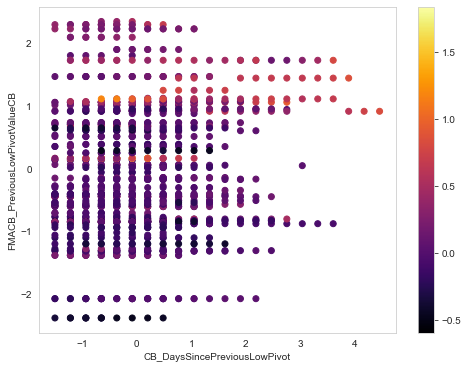

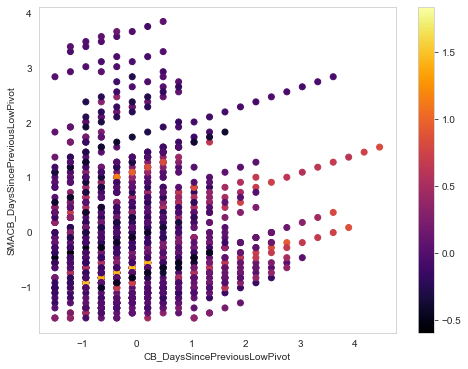

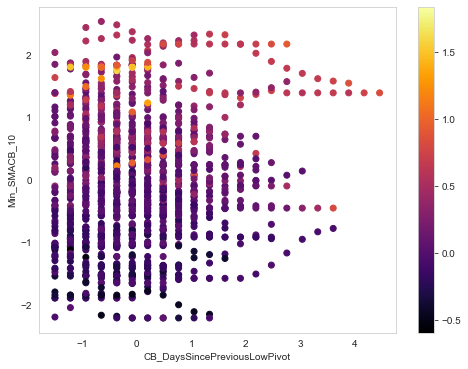

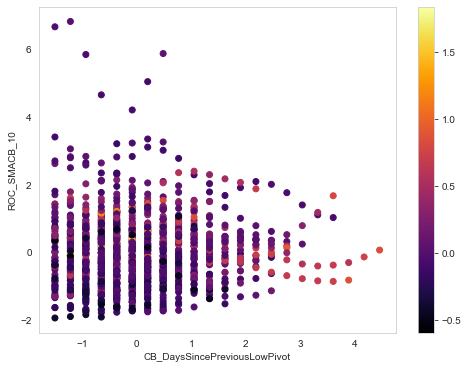

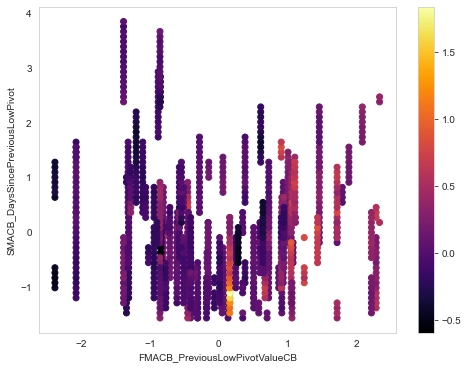

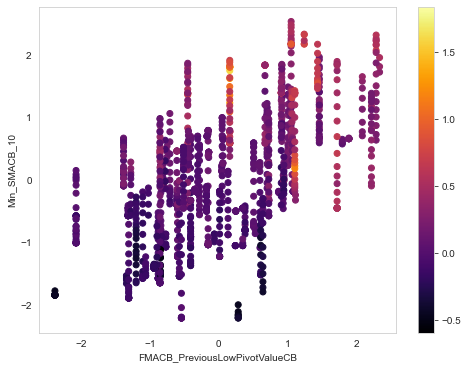

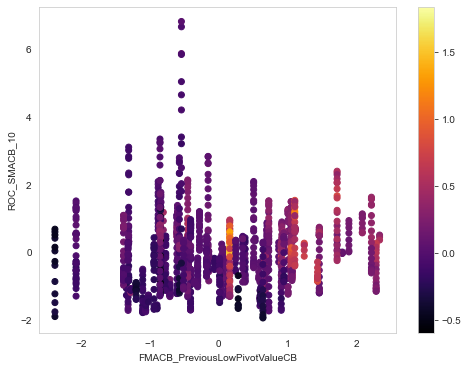

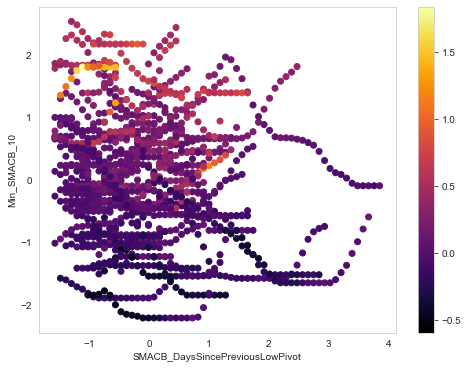

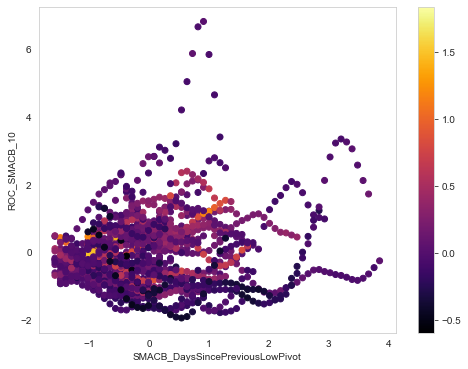

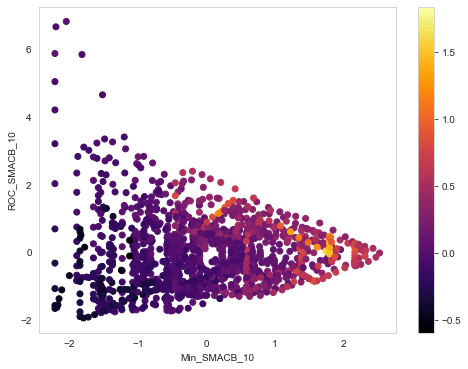

In [33]:
#plotting features against FReturn30
for pair in plot_pairs:
    fig = plt.figure(figsize=(8, 6))
    fig = plt.scatter(x=df_cluster_predict[pair[0]],y=df_cluster_predict[pair[1]], c=df_cluster_predict['FReturn30Unscaled'], cmap='inferno')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.colorbar()
    plt.show()

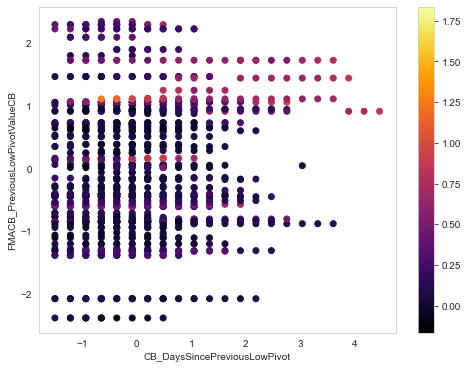

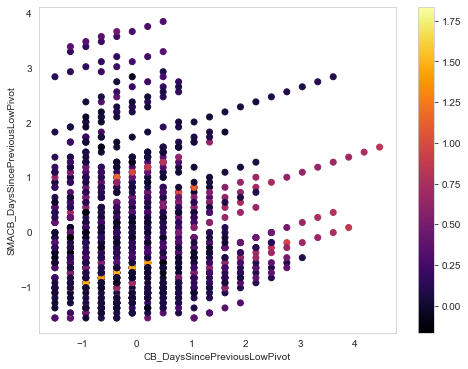

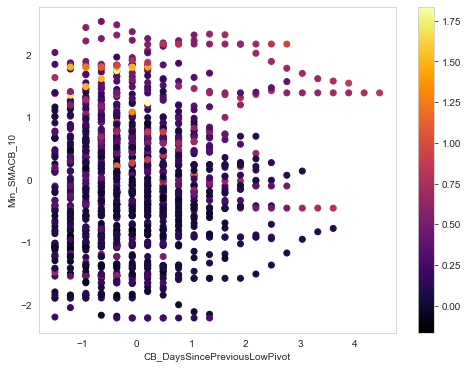

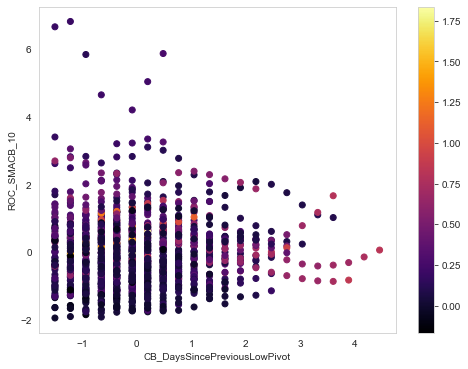

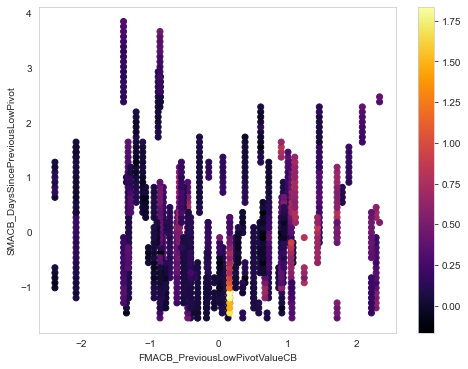

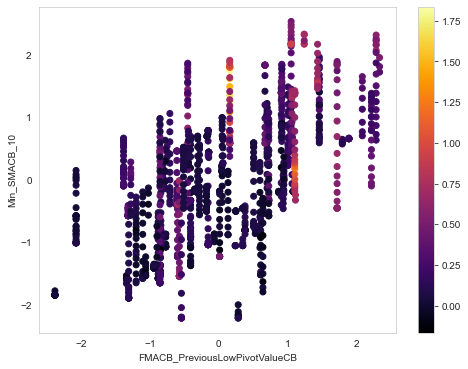

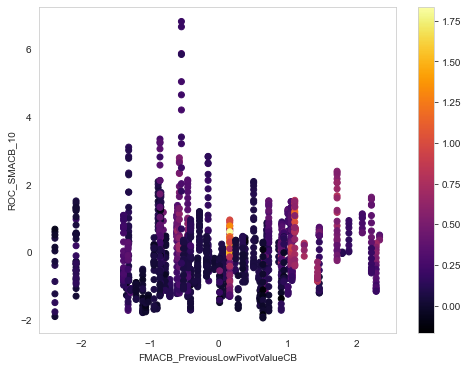

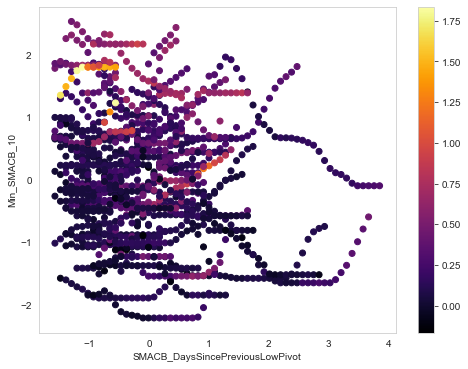

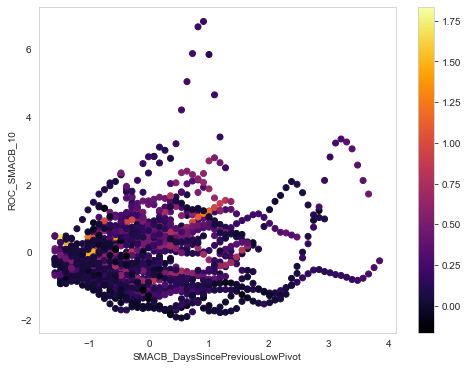

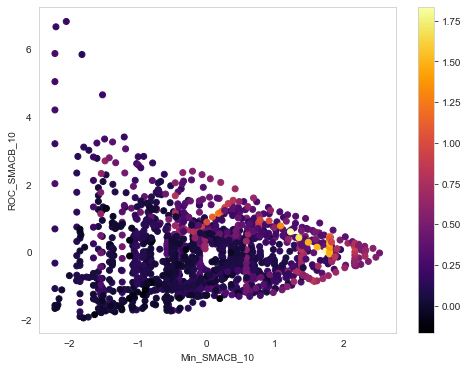

In [34]:
for pair in plot_pairs:
    fig = plt.figure(figsize=(8, 6))
    fig = plt.scatter(x=df_cluster_predict[pair[0]],y=df_cluster_predict[pair[1]], c=df_cluster_predict['FReturn'], cmap='inferno')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.colorbar()
    plt.show()

Cluster Trained on Downside Outliers

In [35]:

with open(f'BTCDownsideOutliersMinReturnOver30Days.pkl', 'rb') as file:
    results_downside = pickle.load(file)

In [36]:
results_downside.iloc[0]

Num Features                                                         3
num_clusters                                                         7
selected_features    [FMACB, FMACB_DaysSincePreviousLowPivot, Min_S...
stdevs               [0.08616080269540374, 0.03484261544589324, 0.0...
metric                                                         0.05743
Name: 2051, dtype: object

In [37]:
data_inp = get_data_BTC()
#plot_price_cb(data_inp)
data = data_inp.copy().drop(columns=["FReturn","Volume","CB_TypeCurrentPivot","CB_PivotValue","CB_TypePreviousPivot","SMACB_TypeCurrentPivot","SMACB_PivotValue","SMACB_TypePreviousPivot","FMACB_TypeCurrentPivot","FMACB_PivotValue","FMACB_TypePreviousPivot","CB_PreviousPivotValue","SMACB_PreviousPivotValue","FMACB_PreviousPivotValue"])
data = data.iloc[100:-1]
data.set_index("Date", inplace=True)
data.columns

Index(['Open', 'High', 'Low', 'Close', 'CB', 'FMACB', 'SMACB',
       'CB_PreviousHighPivotValueCB', 'CB_PreviousLowPivotValueCB',
       'CB_DaysSincePreviousHighPivot', 'CB_DaysSincePreviousLowPivot',
       'CB_IsHighPivot', 'CB_IsLowPivot', 'FMACB_PreviousHighPivotValueCB',
       'FMACB_PreviousLowPivotValueCB', 'FMACB_DaysSincePreviousHighPivot',
       'FMACB_DaysSincePreviousLowPivot', 'FMACB_IsHighPivot',
       'FMACB_IsLowPivot', 'SMACB_PreviousHighPivotValueCB',
       'SMACB_PreviousLowPivotValueCB', 'SMACB_DaysSincePreviousHighPivot',
       'SMACB_DaysSincePreviousLowPivot', 'SMACB_IsHighPivot',
       'SMACB_IsLowPivot', 'Max_CB_10', 'Min_CB_10', 'Max_CB_20', 'Min_CB_20',
       'Max_CB_30', 'Min_CB_30', 'Max_CB_60', 'Min_CB_60', 'Max_FMACB_10',
       'Min_FMACB_10', 'Max_FMACB_20', 'Min_FMACB_20', 'Max_FMACB_30',
       'Min_FMACB_30', 'Max_FMACB_60', 'Min_FMACB_60', 'Max_SMACB_10',
       'Min_SMACB_10', 'Max_SMACB_20', 'Min_SMACB_20', 'Max_SMACB_30',
       'Min_SMA

In [38]:
## Split Train, Test, Validate
df_train = data.loc[:"2018"]
df_validate = data.loc["2019":"2020"]
df_test = data.loc["2021":]

In [39]:
scaled_df_train = pd.DataFrame(StandardScaler().fit_transform(df_train), columns=df_train.columns, index=df_train.index)

In [40]:
df_train["FReturn30Unscaled"] = df_train["Close"].pct_change(30)
scaled_df_train = pd.concat([scaled_df_train, df_train["FReturn30Unscaled"]], axis=1)


In [41]:
df_cluster_downside = prepare_clustering_dataframe(scaled_df_train, df_train, how="DownsideMin")
df_cluster_all = prepare_clustering_dataframe(scaled_df_train, df_train, how="DownsideMinAll")


In [42]:
results = []
all_features = list(df_cluster_downside.columns)
all_features.remove('FReturn')
all_features.remove('FReturn30')
all_features.remove('FReturn30Unscaled')
num_features = 3
selected_features = ['FMACB', 'FMACB_DaysSincePreviousLowPivot', 'Min_SMACB_10']

num_clusters = 7
df_cluster_input = df_cluster_downside[selected_features]
df_cluster_predict = df_cluster_all[selected_features]
X_inp = df_cluster_input.values
X_pred = df_cluster_predict.values
k_means = KMeans(n_clusters=num_clusters, random_state = RANDOM_STATE)
model = k_means.fit(X_inp)
centers = model.cluster_centers_
y_hat = k_means.predict(X_pred)
labels = k_means.labels_

In [43]:
# #Outliers
# df_cluster_input = pd.concat([df_cluster_input.reset_index(), df_cluster_downside.reset_index()[["FReturn", "FReturn30"]],pd.DataFrame(labels).rename({0: 'labels'}, axis=1)], axis=1).set_index("Date")

In [44]:
#All datapoints
df_cluster_predict = pd.concat([df_cluster_predict.reset_index(), df_cluster_all.reset_index()[["FReturn", "FReturn30Unscaled"]],pd.DataFrame(y_hat).rename({0: 'labels'}, axis=1)], axis=1).set_index("Date")


In [45]:
# stdevs = []
# for label in range(num_clusters):
#     if len(df_cluster_input[df_cluster_input["labels"] == label]) > 0:
#         stdevs.append(df_cluster_input[df_cluster_input["labels"] == label]["FReturn"].std(axis=0))
#     else:
#         stdevs.append(0)
# results.append({"Num Features": num_features, "num_clusters": num_clusters,"selected_features": selected_features, "stdevs": stdevs})
# res = pd.DataFrame(results)
# res
#

In [46]:
# print(res.iloc[0]["Num Features"])
# print(res.iloc[0]["num_clusters"])
# print(res.iloc[0]["selected_features"])
#

In [47]:
# for label in range(num_clusters):
#     df = df_cluster_input[df_cluster_input["labels"] == label]
#     print(len(df))
#     df['FReturn30'].hist(bins=10)
#     plt.show()
#
#

In [48]:
# df_cluster_input.columns
#

In [49]:
# # df_cluster_input = df_cluster_input[df_cluster_input['ROC_CB_10']>-2000]
# # df_cluster_predict['ROC_CB_10'].plot()
#

In [50]:
# plot_columns = list(df_cluster_input.columns)#.remove('labels')
# plot_columns.remove('labels')
# plot_columns.remove('FReturn')
# plot_columns.remove('FReturn30')
# plot_pairs = list(itertools.combinations(plot_columns, 2))
#

In [51]:
# plot_pairs
#

In [52]:
# #plotting features against labels
# for pair in plot_pairs:
#     sns.lmplot(x=pair[0],y=pair[1],data=df_cluster_input,hue='labels',fit_reg=False)
#

In [53]:
# #plotting features against FReturn30
# for pair in plot_pairs:
#     fig = plt.figure(figsize=(8, 6))
#     fig = plt.scatter(x=df_cluster_input[pair[0]],y=df_cluster_input[pair[1]], c=df_cluster_input['FReturn30'], cmap='inferno')
#     plt.xlabel(pair[0])
#     plt.ylabel(pair[1])
#     plt.colorbar()
#     plt.show()
#

In [54]:
# for pair in plot_pairs:
#     fig = plt.figure(figsize=(8, 6))
#     fig = plt.scatter(x=df_cluster_input[pair[0]],y=df_cluster_input[pair[1]], c=df_cluster_input['FReturn'], cmap='inferno')
#     plt.xlabel(pair[0])
#     plt.ylabel(pair[1])
#     plt.colorbar()
#     plt.show()

In [55]:
stdevs = []
for label in range(num_clusters):
    if len(df_cluster_predict[df_cluster_predict["labels"] == label]) > 0:
        stdevs.append(df_cluster_predict[df_cluster_predict["labels"] == label]["FReturn"].std(axis=0))
    else:
        stdevs.append(0)
results.append({"Num Features": num_features, "num_clusters": num_clusters,"selected_features": selected_features, "stdevs": stdevs})
res = pd.DataFrame(results)
res

,Num Features,num_clusters,selected_features,stdevs
0,3,7,"[FMACB, FMACB_DaysSincePreviousLowPivot, Min_S...","[0.13070977678129564, 0.057819988577904456, 0...."


In [56]:
print(res.iloc[0]["Num Features"])
print(res.iloc[0]["num_clusters"])
print(res.iloc[0]["selected_features"])

3
7
['FMACB', 'FMACB_DaysSincePreviousLowPivot', 'Min_SMACB_10']


166


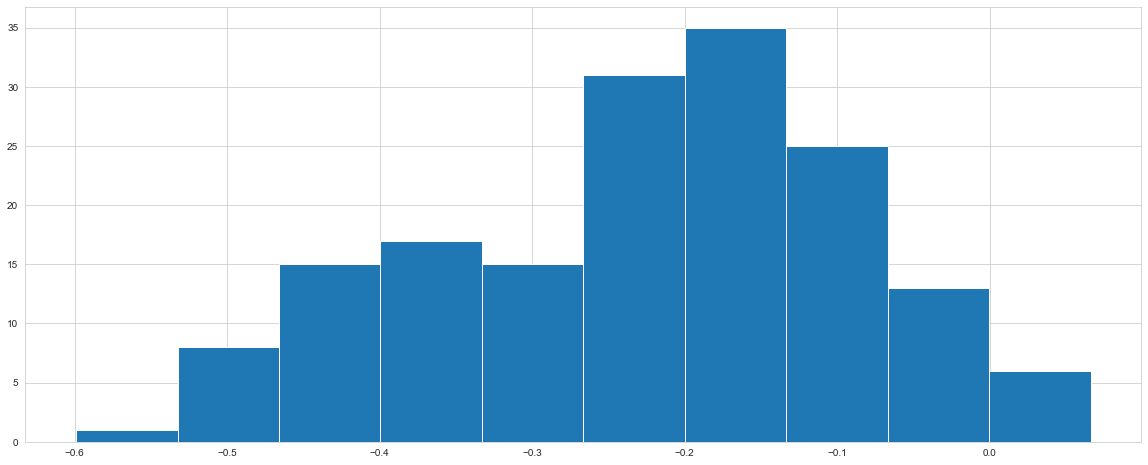

337


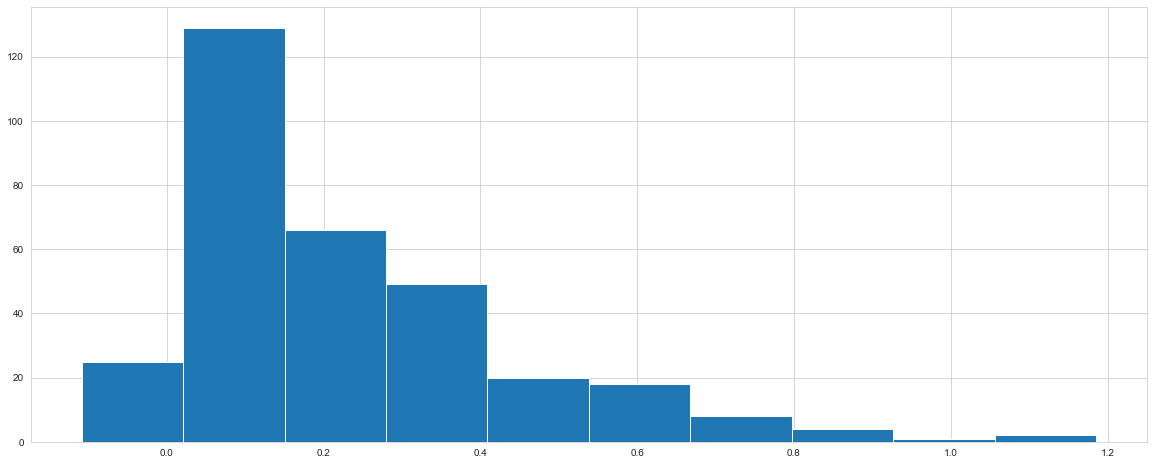

145


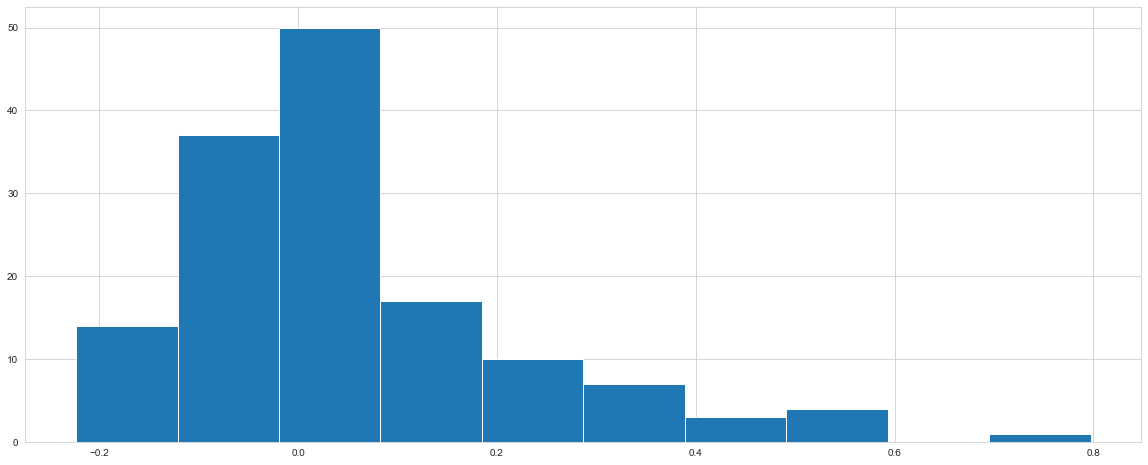

208


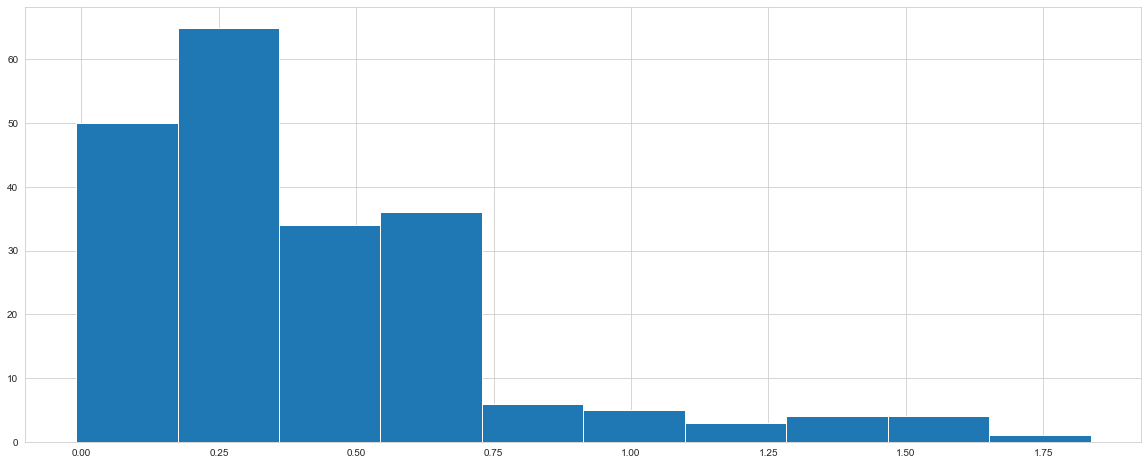

286


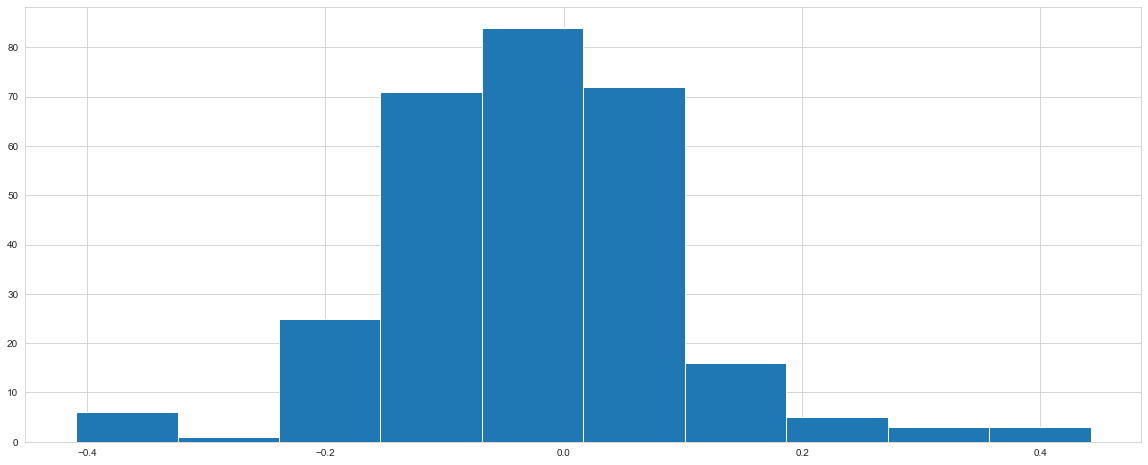

177


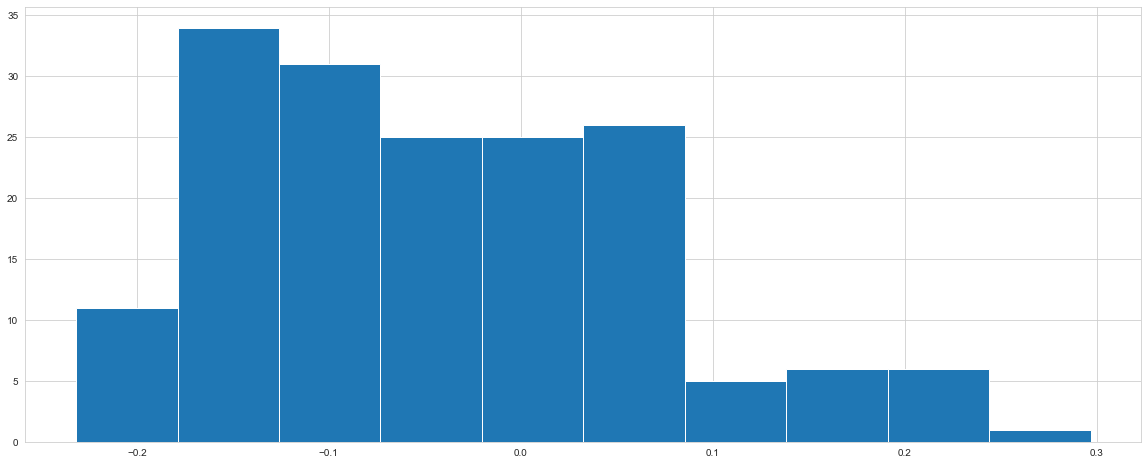

76


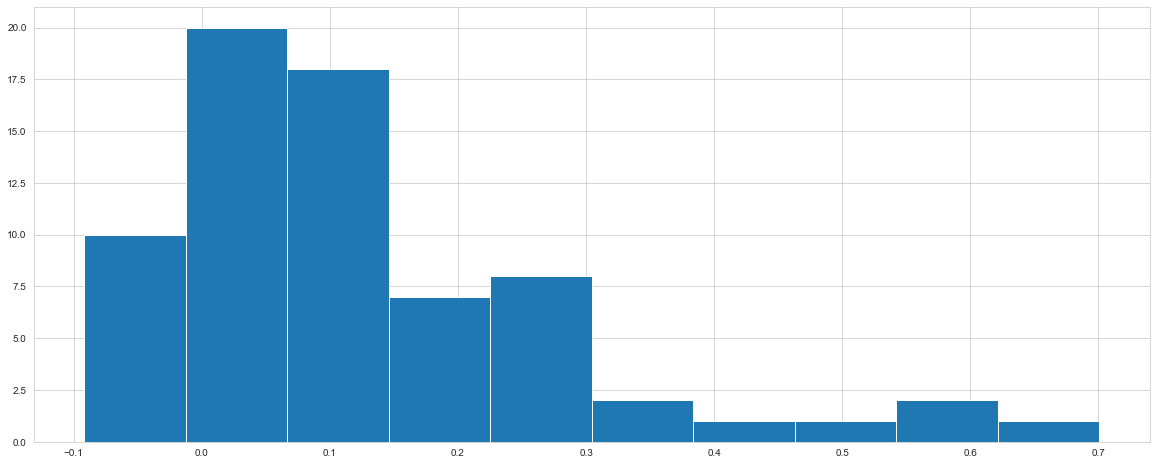

In [57]:
for label in range(num_clusters):
    df = df_cluster_predict[df_cluster_predict["labels"] == label]
    print(len(df))
    df['FReturn30Unscaled'].hist(bins=10)
    plt.show()


In [58]:
plot_columns = list(df_cluster_predict.columns)#.remove('labels')
plot_columns.remove('labels')
plot_columns.remove('FReturn')
plot_columns.remove('FReturn30Unscaled')
plot_pairs = list(itertools.combinations(plot_columns, 2))

In [59]:
plot_pairs

[('FMACB', 'FMACB_DaysSincePreviousLowPivot'),
 ('FMACB', 'Min_SMACB_10'),
 ('FMACB_DaysSincePreviousLowPivot', 'Min_SMACB_10')]

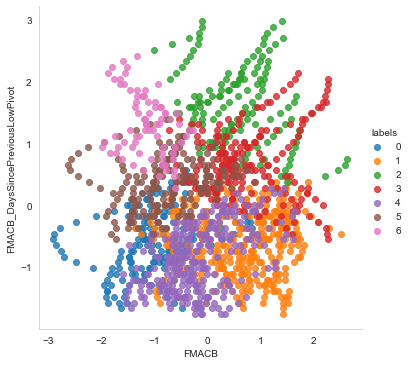

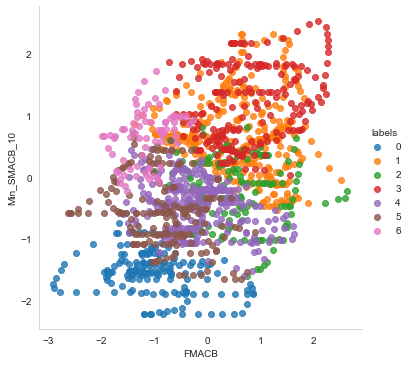

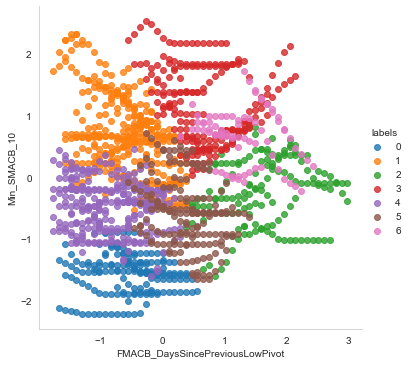

In [60]:
#plotting features against labels
for pair in plot_pairs:
    sns.lmplot(x=pair[0],y=pair[1],data=df_cluster_predict,hue='labels',fit_reg=False)

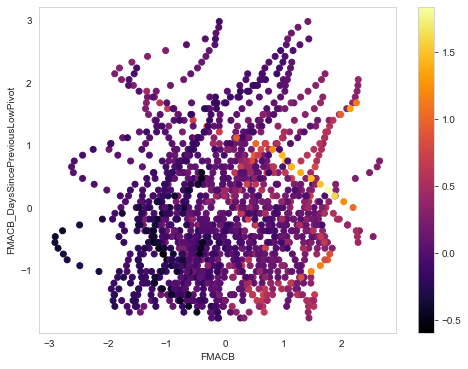

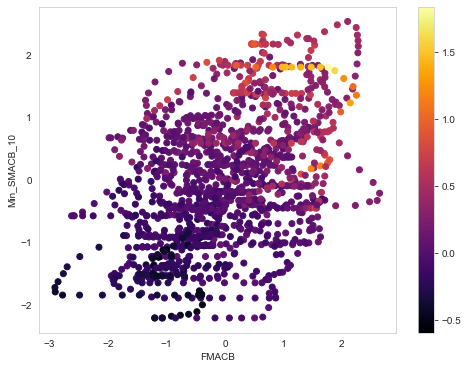

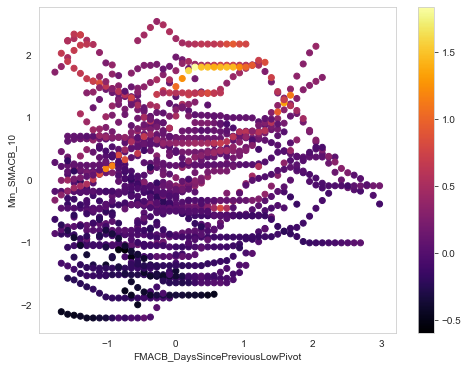

In [61]:
#plotting features against FReturn30
for pair in plot_pairs:
    fig = plt.figure(figsize=(8, 6))
    fig = plt.scatter(x=df_cluster_predict[pair[0]],y=df_cluster_predict[pair[1]], c=df_cluster_predict['FReturn30Unscaled'], cmap='inferno')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.colorbar()
    plt.show()

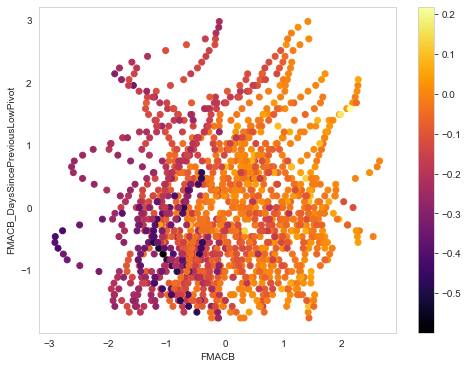

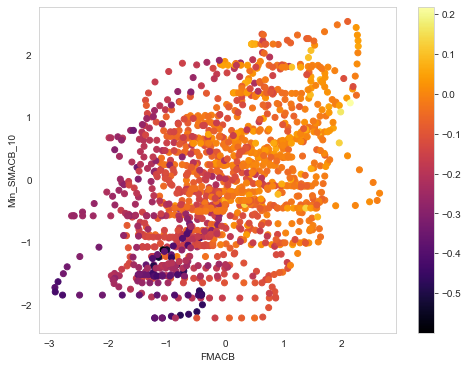

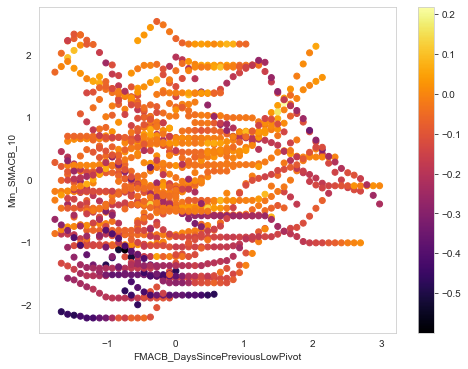

In [62]:
for pair in plot_pairs:
    fig = plt.figure(figsize=(8, 6))
    fig = plt.scatter(x=df_cluster_predict[pair[0]],y=df_cluster_predict[pair[1]], c=df_cluster_predict['FReturn'], cmap='inferno')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.colorbar()
    plt.show()